#**Sample Superstore Case Study**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import legend
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [3]:
!gdown 1xiLSG7Of42D0WLEOIC7IHG1oTXcyBM7Rfpe8ii97B84

Downloading...
From (original): https://drive.google.com/uc?id=1xiLSG7Of42D0WLEOIC7IHG1oTXcyBM7Rfpe8ii97B84
From (redirected): https://docs.google.com/spreadsheets/d/1xiLSG7Of42D0WLEOIC7IHG1oTXcyBM7Rfpe8ii97B84/export?format=xlsx
To: /content/Sample_superstore.xlsx
1.07MB [00:00, 3.67MB/s]


In [88]:
df = pd.read_excel('/content/Sample_superstore.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [11]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [12]:
for i in df.columns:
  print(i,':',df[i].nunique())

Row ID : 9994
Order ID : 5009
Order Date : 1237
Ship Date : 1334
Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Postal Code : 631
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850
Sales : 5825
Quantity : 14
Discount : 12
Profit : 7287


In [13]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [14]:
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_columns

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

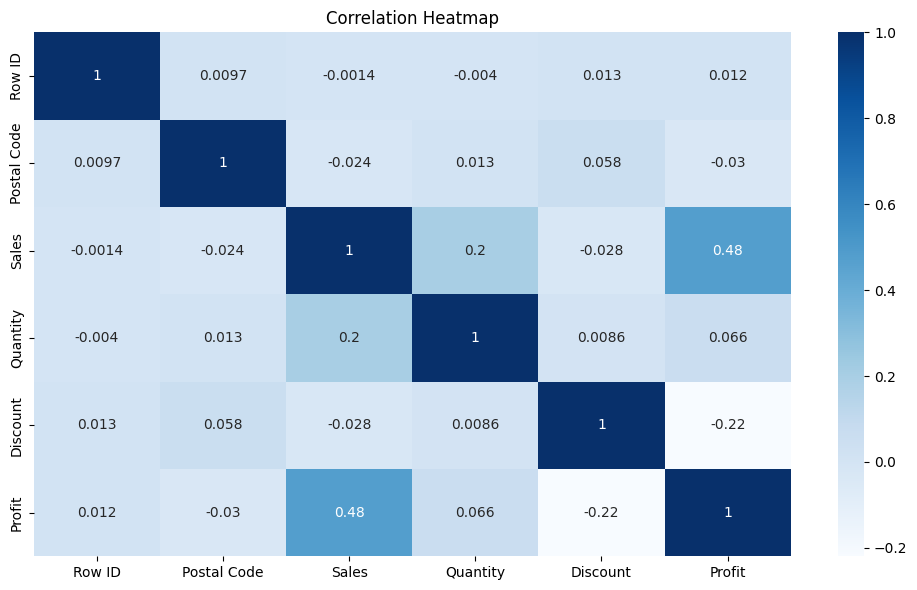

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='Blues')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [16]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier_sales = df[(df['Sales'] < lower) | (df['Sales'] > upper)]
print(f"Outliers in Sales: {len(outlier_sales)} rows")
outlier_sales[['Category','Product Name','Sales']]

Outliers in Sales: 1167 rows


,Category,Product Name,Sales
1,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775
7,Technology,Mitel 5320 IP Phone VoIP phone,907.1520
10,Furniture,Chromcraft Rectangular Conference Tables,1706.1840
11,Technology,Konftel 250 Conference phone - Charcoal black,911.4240
...,...,...,...
9931,Furniture,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320
9942,Office Supplies,"Carina Mini System Audio Rack, Model AR050B",998.8200
9947,Furniture,Hon 4070 Series Pagoda Round Back Stacking Chairs,1925.8800
9948,Office Supplies,Honeywell Enviracaire Portable HEPA Air Cleane...,2405.2000


In [17]:
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier_profit = df[(df['Profit'] < lower) | (df['Profit'] > upper)]
print(f"Outliers in Profit: {len(outlier_profit)} rows")
outlier_profit[['Category','Product Name','Profit']]

Outliers in Profit: 1881 rows


,Category,Product Name,Profit
1,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",219.5820
3,Furniture,Bretford CR4500 Series Slim Rectangular Table,-383.0310
7,Technology,Mitel 5320 IP Phone VoIP phone,90.7152
10,Furniture,Chromcraft Rectangular Conference Tables,85.3092
13,Office Supplies,Fellowes PB200 Plastic Comb Binding Machine,132.5922
...,...,...,...
9957,Office Supplies,Xerox 1882,109.7208
9962,Furniture,Bush Heritage Pine Collection 5-Shelf Bookcase...,-67.6704
9968,Office Supplies,Ibico Ibimaster 300 Manual Binding System,331.1910
9979,Office Supplies,Ibico Recycled Linen-Style Covers,153.1152


In [18]:
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier_quantity = df[(df['Quantity'] < lower) | (df['Quantity'] > upper)]
print(f"Outliers in Quantity: {len(outlier_quantity)} rows")
outlier_quantity[['Product Name','Quantity','Sales']]

Outliers in Quantity: 170 rows


,Product Name,Quantity,Sales
113,"OIC Colored Binder Clips, Assorted Sizes",14,40.096
139,Longer-Life Soft White Bulbs,14,43.120
147,Plantronics Cordless Phone Headset with In-lin...,11,384.450
251,Logitech P710e Mobile Speakerphone,13,3347.370
329,Round Specialty Laser Printer Labels,10,100.240
...,...,...,...
9882,"Maxell 74 Minute CD-R Spindle, 50/Pack",13,272.610
9895,"Maxell Pro 80 Minute CD-R, 10/Pack",11,153.824
9941,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,14,223.580
9979,Ibico Recycled Linen-Style Covers,14,437.472


In [19]:
Q1 = df['Discount'].quantile(0.25)
Q3 = df['Discount'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier_discount = df[(df['Discount'] < lower) | (df['Discount'] > upper)]
print(f"Outliers in Discount: {len(outlier_discount)} rows")
outlier_discount[['Product Name','Discount','Sales']]

Outliers in Discount: 856 rows


,Product Name,Discount,Sales
14,Holmes Replacement Filter for HEPA Air Cleaner...,0.8,68.810
15,Storex DuraTech Recycled Plastic Frosted Binders,0.8,2.544
28,Avery Recycled Flexi-View Covers for Binding S...,0.7,9.618
32,"Acco Pressboard Covers with Storage Hooks, 14 ...",0.7,6.858
36,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",0.6,190.920
...,...,...,...
9870,GBC Standard Therm-A-Bind Covers,0.7,22.428
9877,Wilson Jones Clip & Carry Folder Binder Tool f...,0.7,8.700
9903,"GE General Use Halogen Bulbs, 100 Watts, 1 Bul...",0.6,25.128
9920,"GBC Pre-Punched Binding Paper, Plastic, White,...",0.8,22.386


In [20]:
continuous_vars = ['Sales', 'Quantity', 'Discount', 'Profit']

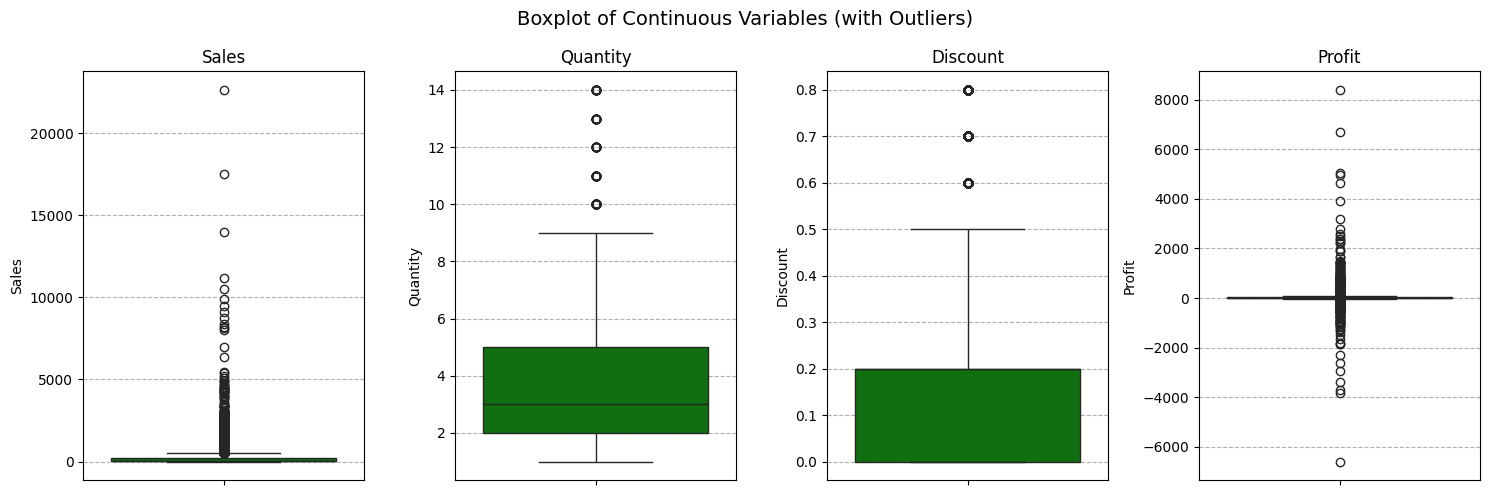

In [21]:
plt.figure(figsize=(15,5))
for i,col in enumerate(continuous_vars):
  plt.subplot(1,len(continuous_vars),i+1)
  sns.boxplot(y=df[col],color='green')
  plt.title(col)
  plt.grid(axis='y',linestyle='--')
plt.suptitle('Boxplot of Continuous Variables (with Outliers)', fontsize=14)
plt.tight_layout()
plt.show()

In [22]:
df_clip = df.copy()
for col in continuous_vars:
  lower = df_clip[col].quantile(0.05)
  upper = df_clip[col].quantile(0.95)
  df_clip = df_clip[(df_clip[col] >= lower) & (df_clip[col] <= upper)]

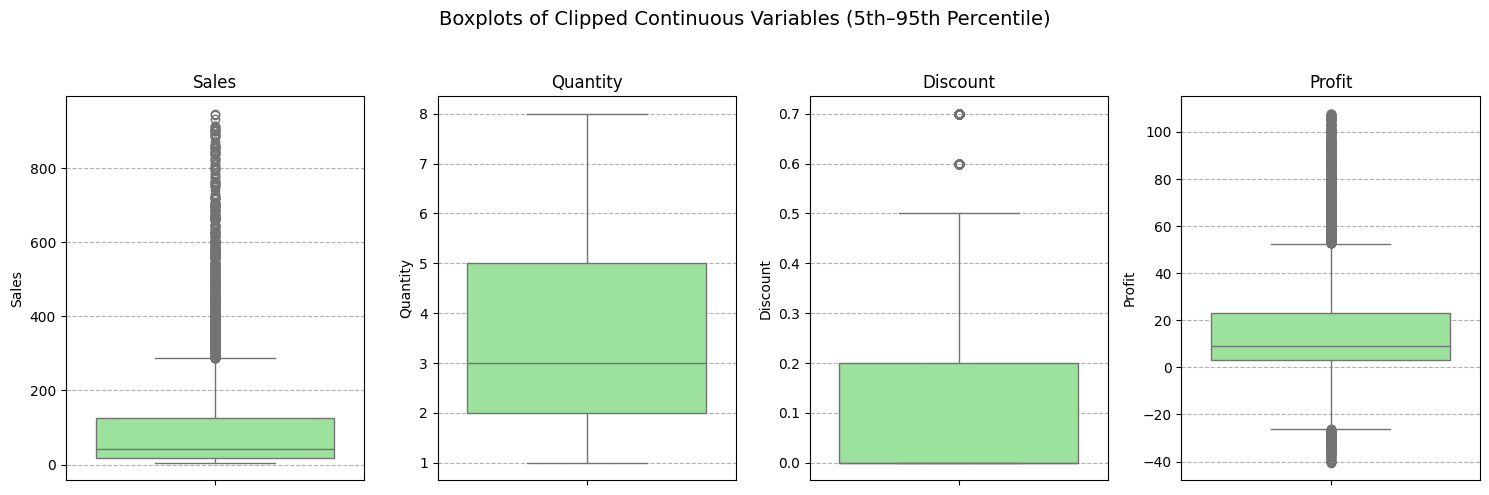

In [23]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(continuous_vars):
    plt.subplot(1, len(continuous_vars), i+1)
    sns.boxplot(y=df_clip[col], color='lightgreen')
    plt.title(col)
    plt.grid(axis='y', linestyle='--')
plt.suptitle('Boxplots of Clipped Continuous Variables (5th–95th Percentile)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [24]:
df_year = df['Order Date'].dt.year
df_year.value_counts()

,count
Order Date,
2017,3312
2016,2587
2015,2102
2014,1993


In [25]:
categorical_sales = df.groupby('Category')['Sales'].sum()
categorical_sales

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


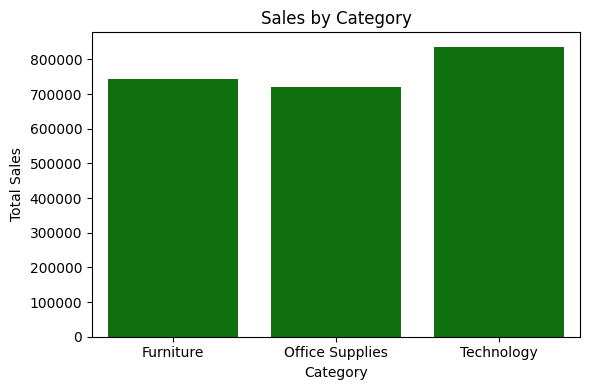

In [26]:
plt.figure(figsize=(6,4))
sns.barplot(x=categorical_sales.index, y=categorical_sales.values,color='green')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [27]:
profit_by_cat = df.groupby('Category')['Profit'].sum()
profit_by_cat

,Profit
Category,
Furniture,18451.2728
Office Supplies,122490.8008
Technology,145454.9481


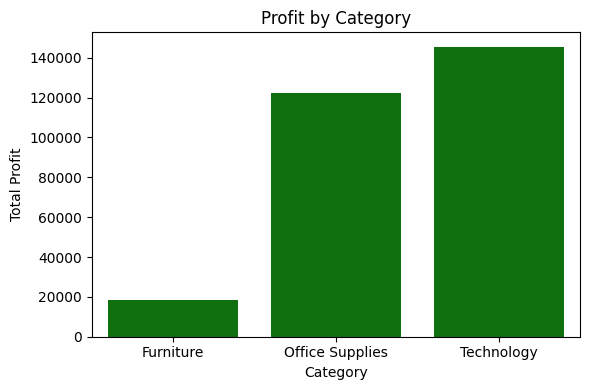

In [28]:
plt.figure(figsize=(6,4))
sns.barplot(x=profit_by_cat.index, y=profit_by_cat.values,color='green')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()

In [29]:
top_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_selling_products

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480
HON 5400 Series Task Chairs for Big and Tall,21870.576
GBC DocuBind TL300 Electric Binding System,19823.479
GBC Ibimaster 500 Manual ProClick Binding System,19024.500
Hewlett Packard LaserJet 3310 Copier,18839.686
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895
GBC DocuBind P400 Electric Binding System,17965.068


In [30]:
least_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).tail(10)
least_selling_products

,Sales
Product Name,
Newell 308,8.400
Stockwell Gold Paper Clips,8.096
4009 Highlighters,8.040
Xerox 1989,7.968
"Avery Hi-Liter Comfort Grip Fluorescent Highlighter, Yellow Ink",7.800
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,7.700
Grip Seal Envelopes,7.072
Xerox 20,6.480
Avery 5,5.760


In [31]:
top_profit_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_profit_products

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
Ativa V4110MDD Micro-Cut Shredder,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,3696.2820
Ibico EPK-21 Electric Binding System,3345.2823


In [32]:
least_profit_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).tail(10)
least_profit_products

,Profit
Product Name,
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,-1148.4375
Balt Solid Wood Round Tables,-1201.0581
Martin Yale Chadless Opener Electric Letter Opener,-1299.1836
Cisco TelePresence System EX90 Videoconferencing Unit,-1811.0784
GBC DocuBind P400 Electric Binding System,-1878.1662
Bush Advantage Collection Racetrack Conference Table,-1934.3976
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156
Cubify CubeX 3D Printer Triple Head Print,-3839.9904
Lexmark MX611dhe Monochrome Laser Printer,-4589.9730


In [33]:
top_product_subcat = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)
top_product_subcat

,Sales
Sub-Category,
Phones,330007.0540
Chairs,328449.1030
Storage,223843.6080
Tables,206965.5320
Binders,203412.7330
Machines,189238.6310
Accessories,167380.3180
Copiers,149528.0300
Bookcases,114879.9963


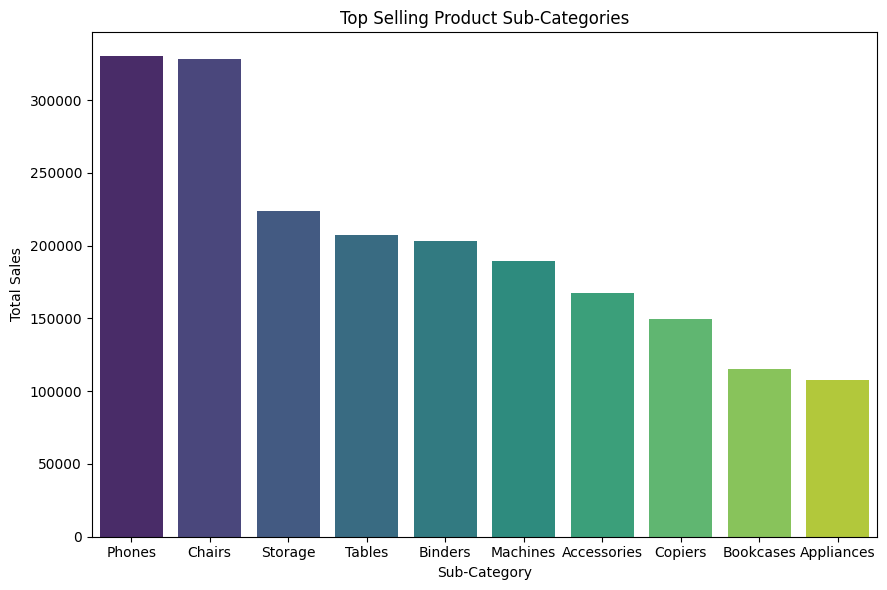

In [34]:
plt.figure(figsize=(9,6))
sns.barplot(x=top_product_subcat.index,y=top_product_subcat.values,palette='viridis')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Top Selling Product Sub-Categories')
plt.tight_layout()
plt.show()

In [35]:
least_selling_product_subcat = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).tail(5)
least_selling_product_subcat

,Sales
Sub-Category,
Supplies,46673.538
Art,27118.792
Envelopes,16476.402
Labels,12486.312
Fasteners,3024.280


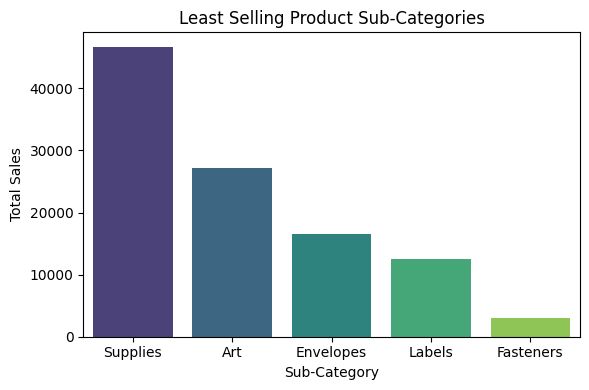

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x=least_selling_product_subcat.index,y=least_selling_product_subcat.values,palette='viridis')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.title('Least Selling Product Sub-Categories')
plt.tight_layout()
plt.show()

In [37]:
region = df['Region'].value_counts()
region

,count
Region,
West,3203
East,2848
Central,2323
South,1620


In [38]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


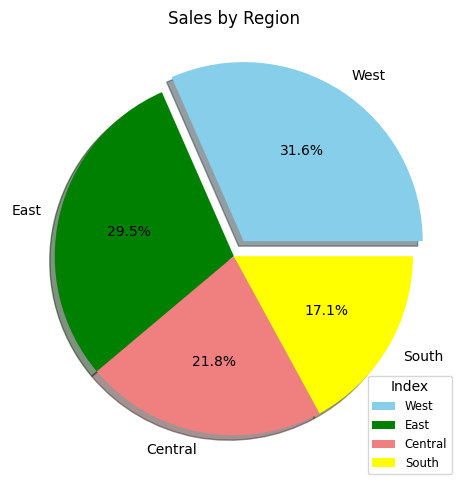

In [39]:
plt.figure(figsize=(6,5))
explode = (0.1,0,0,0)
colors = ['skyblue','green','lightcoral','yellow']
plt.pie(region_sales,labels=region_sales.index,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('Sales by Region')
plt.legend(title='Index',labels=['West','East','Central','South'],loc='lower right',fontsize='small')
plt.tight_layout()
plt.show()

In [40]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
region_profit

,Profit
Region,
West,108418.4489
East,91522.7800
South,46749.4303
Central,39706.3625


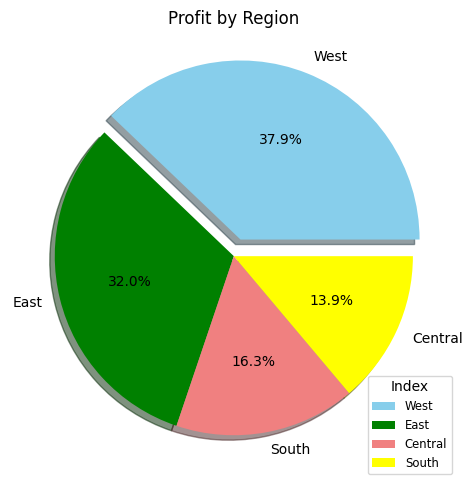

In [41]:
plt.figure(figsize=(6,5))
explode = (0.1,0,0,0)
colors = ['skyblue','green','lightcoral','yellow']
plt.pie(region_profit,labels=region_profit.index,explode=explode,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('Profit by Region')
plt.legend(title='Index',labels=['West','East','Central','South'],loc='lower right',fontsize='small')
plt.tight_layout()
plt.show()

In [42]:
yearly_sales_trend = round(df.groupby(df['Order Date'].dt.year)['Sales'].sum(),2)
yearly_sales_trend

,Sales
Order Date,
2014,484247.50
2015,470532.51
2016,609205.60
2017,733215.26


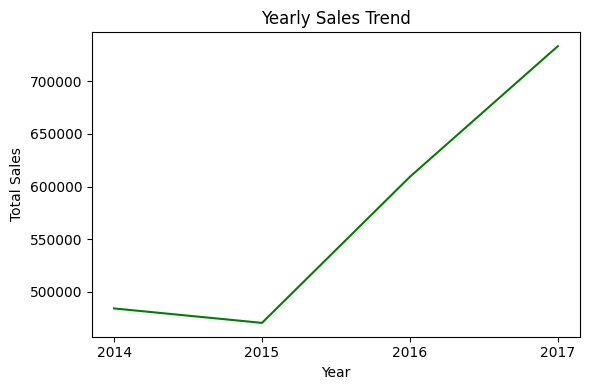

In [43]:
plt.figure(figsize=(6,4))
sns.lineplot(x=yearly_sales_trend.index, y=yearly_sales_trend.values,color='green')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(yearly_sales_trend.index)
plt.tight_layout()
plt.show()

In [44]:
yearly_profit_trend = round(df.groupby(df['Order Date'].dt.year)['Profit'].sum(),2)
yearly_profit_trend

,Profit
Order Date,
2014,49543.97
2015,61618.60
2016,81795.17
2017,93439.27


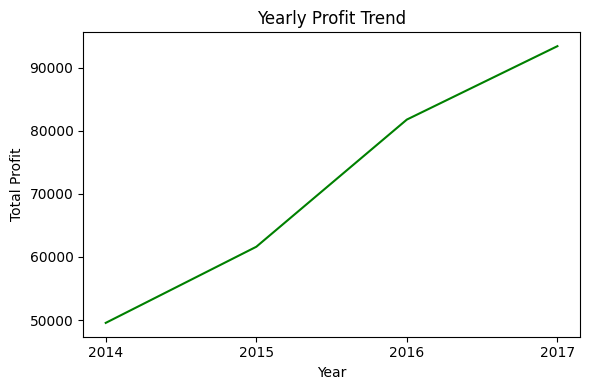

In [45]:
plt.figure(figsize=(6,4))
sns.lineplot(x=yearly_profit_trend.index, y=yearly_profit_trend.values,color='green')
plt.title('Yearly Profit Trend')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks(yearly_profit_trend.index)
plt.tight_layout()
plt.show()

In [46]:
df['Year'] = df['Order Date'].dt.to_period('Y').astype(str)
yearly = df.groupby('Year')[['Sales','Profit']].sum().reset_index()
yearly = yearly.sort_values(by='Year')
yearly

,Year,Sales,Profit
0,2014,484247.4981,49543.9741
1,2015,470532.5090,61618.6037
2,2016,609205.5980,81795.1743
3,2017,733215.2552,93439.2696


In [47]:
fig = px.line(yearly,x='Year',y=['Sales','Profit'],
              title='Yearly Sales & Profit Trend',markers=True)
fig.update_layout(xaxis_title='Year',yaxis_title='Amount($)',
                  legend_title='Metric')
fig.show()

In [48]:
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)
monthly = df.groupby('Month')[['Sales','Profit']].sum().reset_index()
monthly = monthly.sort_values(by='Month')
monthly

,Month,Sales,Profit
0,2014-01,14236.8950,2450.1907
1,2014-02,4519.8920,862.3084
2,2014-03,55691.0090,498.7299
3,2014-04,28295.3450,3488.8352
4,2014-05,23648.2870,2738.7096
5,2014-06,34595.1276,4976.5244
6,2014-07,33946.3930,-841.4826
7,2014-08,27909.4685,5318.1050
8,2014-09,81777.3508,8328.0994
9,2014-10,31453.3930,3448.2573


In [49]:
fig = px.line(monthly,x='Month',y=['Sales','Profit'],
              title='Monthly Sales & Profit Trend',markers=True)
fig.update_layout(xaxis_title='Month',yaxis_title='Amount($)',
                  legend_title='Metric')
fig.show()

In [50]:
df['Week'] = df['Order Date'].dt.day_name()
weekly = round(df.groupby('Week')[['Sales','Profit']].sum().reset_index(),2)
weekly = weekly.sort_values(by='Week')
weekly

,Week,Sales,Profit
0,Friday,427692.26,46520.82
1,Monday,428937.82,51511.11
2,Saturday,357984.68,41277.62
3,Sunday,385353.85,57129.51
4,Thursday,321965.78,39683.75
5,Tuesday,287209.50,35570.33
6,Wednesday,88056.98,14703.87


In [51]:
fig = px.line(weekly,x='Week',y=['Sales','Profit'],
              title='Week-wise Sales & Profit Trend',markers=True)
fig.update_layout(xaxis_title='Week',yaxis_title='Amount($)',
                  legend_title='Metric')
fig.show()

In [52]:
top_10_states = round(df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10),2)
top_10_states

,Sales
State,
California,457687.63
New York,310876.27
Texas,170188.05
Washington,138641.27
Pennsylvania,116511.91
Florida,89473.71
Illinois,80166.10
Ohio,78258.14
Michigan,76269.61


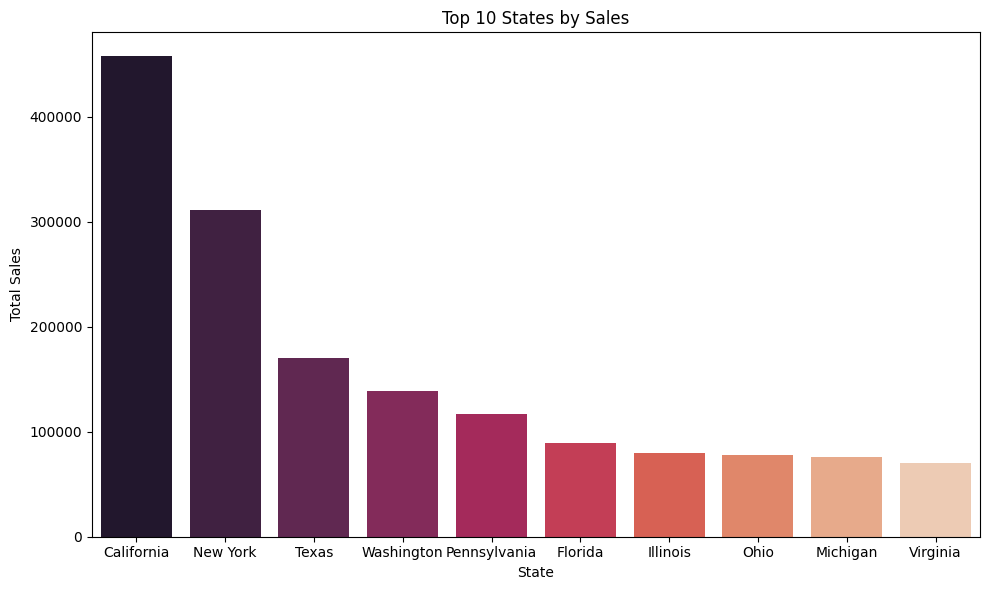

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_states.index,y=top_10_states.values,palette='rocket')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Top 10 States by Sales')
plt.tight_layout()
plt.show()

In [54]:
top_10_profit_states = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
top_10_profit_states

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


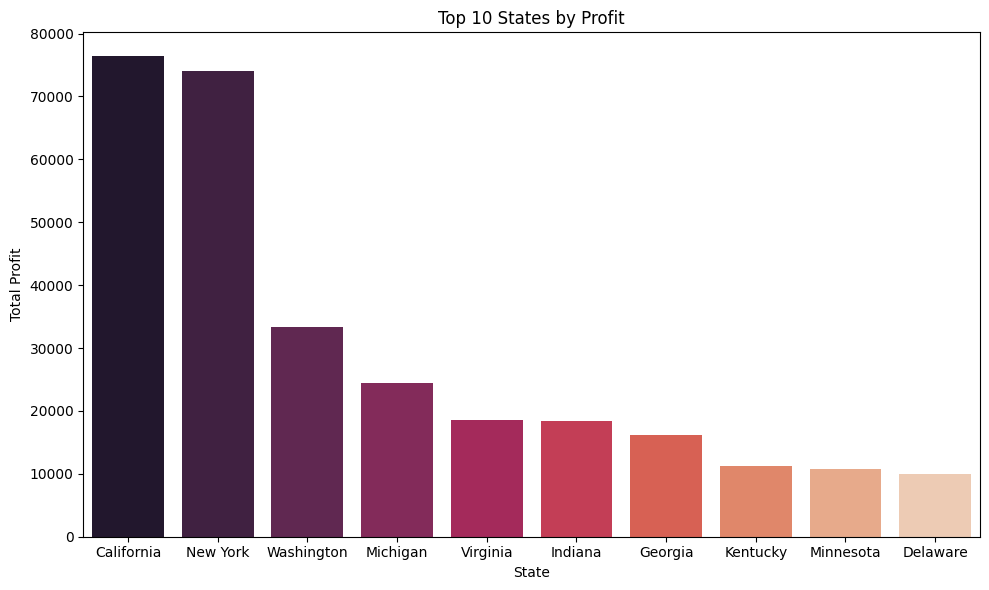

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_profit_states.index,y=top_10_profit_states.values,palette='rocket')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.title('Top 10 States by Profit')
plt.tight_layout()
plt.show()

In [56]:
top_10_cities = round(df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10),2)
top_10_cities

,Sales
City,
New York City,256368.16
Los Angeles,175851.34
Seattle,119540.74
San Francisco,112669.09
Philadelphia,109077.01
Houston,64504.76
Chicago,48539.54
San Diego,47521.03
Jacksonville,44713.18


In [57]:
top_10_cities_df = top_10_cities.reset_index()
top_10_cities_df.columns = ['City', 'Sales']

fig = px.scatter(top_10_cities_df, x='City', y='Sales', size='Sales',
                 color='City',hover_name='City',text='Sales', size_max=60,
                 title='Top 10 Cities by Sales')
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title='City', yaxis_title='Total Sales',height=700)
fig.show()

In [58]:
top_10_cities_profit = round(df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(10),2)
top_10_cities_profit

,Profit
City,
New York City,62036.98
Los Angeles,30440.76
Seattle,29156.10
San Francisco,17507.39
Detroit,13181.79
Lafayette,10018.39
Jackson,7581.68
Atlanta,6993.66
Minneapolis,6824.58


In [59]:
top_10_cities_profit_df = top_10_cities_profit.reset_index()
top_10_cities_profit_df.columns = ['City', 'Profit']

fig = px.scatter(top_10_cities_profit_df, x='City', y='Profit', size='Profit',
                 color='City',hover_name='City',text='Profit', size_max=60,
                 title='Top 10 Cities by Profit')
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title='City', yaxis_title='Total Profit',height=700)
fig.show()

In [60]:
segment = round(df.groupby('Segment')['Sales'].sum().sort_values(ascending=False),2)
segment

,Sales
Segment,
Consumer,1161401.34
Corporate,706146.37
Home Office,429653.15


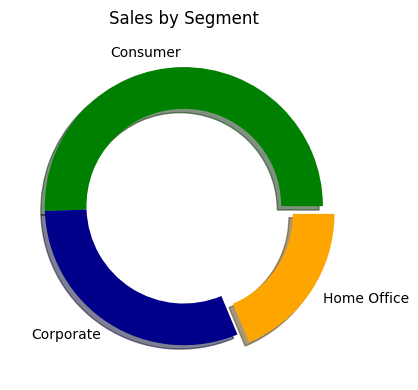

In [61]:
plt.figure(figsize=(6,4))
explode = (0,0,0.1)
colors = ['green','darkblue','orange']
plt.pie(segment,labels=segment.index,explode=explode,
        colors=colors,shadow=True,wedgeprops={'width': 0.3})
plt.title('Sales by Segment')
plt.tight_layout()
plt.show()

In [62]:
segment_profit = round(df.groupby('Segment')['Profit'].sum().sort_values(ascending=False),2)
segment_profit

,Profit
Segment,
Consumer,134119.21
Corporate,91979.13
Home Office,60298.68


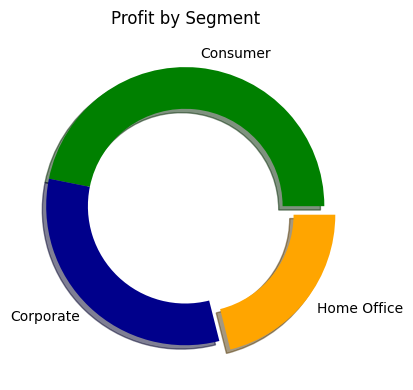

In [63]:
plt.figure(figsize=(6,4))
explode = (0,0,0.1)
colors = ['green','darkblue','orange']
plt.pie(segment_profit,labels=segment_profit.index,explode=explode,
        colors=colors,shadow=True,wedgeprops={'width': 0.3})
plt.title('Profit by Segment')
plt.tight_layout()
plt.show()

In [64]:
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'}

df['State_Abbrev'] = df['State'].map(us_state_abbrev)
df['State_Abbrev']

,State_Abbrev
0,KY
1,KY
2,CA
3,FL
4,FL
...,...
9989,FL
9990,CA
9991,CA
9992,CA


In [65]:
sales_map = df.groupby('State_Abbrev',as_index=False)['Sales'].sum()
fig = px.choropleth(sales_map,locations='State_Abbrev',locationmode='USA-states',
                    color='Sales',color_continuous_scale='Blues',
                    scope='usa',hover_name='State_Abbrev',
                    title='State-wise Sales Distribution In the USA')
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'),
                   title_font=dict(size=22, family="Times New Roman", color="black"),
                  margin=dict(r=0, t=40, l=0, b=0))
fig.show()

In [66]:
profit_map = df.groupby('State_Abbrev',as_index=False)['Profit'].sum()
fig = px.choropleth(profit_map,locations='State_Abbrev',locationmode='USA-states',
                    color='Profit',color_continuous_scale='Reds',
                    scope='usa',hover_name='State_Abbrev',
                    title='State-wise Profit Distribution Across USA')
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'),
                   title_font=dict(size=22, family="Times New Roman", color="black"),
                  margin=dict(r=0, t=40, l=0, b=0))
fig.show()

In [67]:
df['Profit Margin %'] = (df['Profit'] / df['Sales']) * 100
df['Profit Margin %'] = df['Profit Margin %'].round(2)
df[['Order ID','Sales','Profit','Profit Margin %']]

,Order ID,Sales,Profit,Profit Margin %
0,CA-2016-152156,261.9600,41.9136,16.00
1,CA-2016-152156,731.9400,219.5820,30.00
2,CA-2016-138688,14.6200,6.8714,47.00
3,US-2015-108966,957.5775,-383.0310,-40.00
4,US-2015-108966,22.3680,2.5164,11.25
...,...,...,...,...
9989,CA-2014-110422,25.2480,4.1028,16.25
9990,CA-2017-121258,91.9600,15.6332,17.00
9991,CA-2017-121258,258.5760,19.3932,7.50
9992,CA-2017-121258,29.6000,13.3200,45.00


In [68]:
total_sales = round(df['Sales'].sum(),2)
total_profit = round(df['Profit'].sum(),2)
profit_margin = round((total_profit/total_sales)*100,2)
num_orders = df['Order ID'].nunique()
aov = round(total_sales/num_orders,2)
kpi = pd.DataFrame([total_sales,total_profit,profit_margin,num_orders,aov])
kpi.index = ['Total Sales','Total Profit','Profit Margin','Total Number of Orders','Average Order Value']
kpi.rename(columns={0:'Key Performance Indicators'},inplace=True)
kpi

,Key Performance Indicators
Total Sales,2297200.86
Total Profit,286397.02
Profit Margin,12.47
Total Number of Orders,5009.00
Average Order Value,458.61


In [69]:
category_margin = df.groupby('Category')[['Sales','Profit']].sum().reset_index()
category_margin['Profit_Margin'] = round(category_margin["Profit"] / category_margin["Sales"],4)
category_margin['Profit_Margin_Percent'] = (category_margin['Profit_Margin'] * 100).round(2)
category_margin

,Category,Sales,Profit,Profit_Margin,Profit_Margin_Percent
0,Furniture,741999.7953,18451.2728,0.0249,2.49
1,Office Supplies,719047.0320,122490.8008,0.1704,17.04
2,Technology,836154.0330,145454.9481,0.1740,17.40


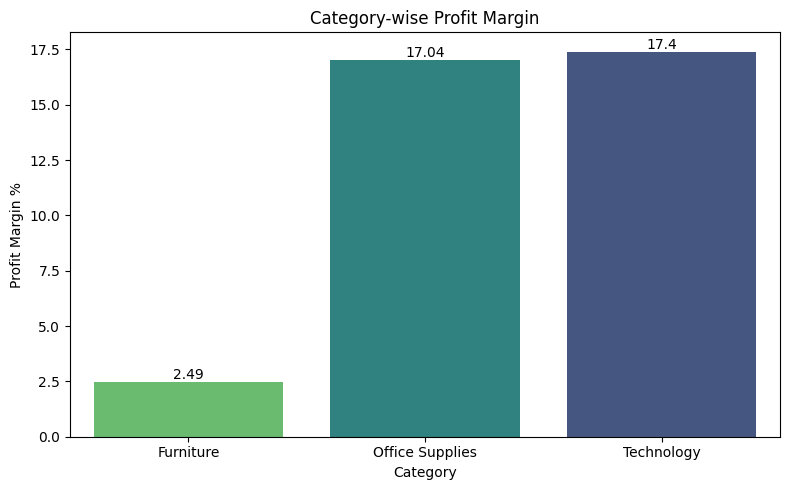

In [70]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x=category_margin['Category'],y=category_margin['Profit_Margin_Percent'],
                 palette='viridis_r')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Category')
plt.ylabel('Profit Margin %')
plt.title('Category-wise Profit Margin')
plt.tight_layout()
plt.show()

In [71]:
subcat_margin = df.groupby('Sub-Category')[['Sales','Profit']].sum().reset_index()
subcat_margin['Profit_Margin'] = round(subcat_margin["Profit"] / subcat_margin["Sales"],4)
subcat_margin['Profit_Margin_Percent'] = (subcat_margin['Profit_Margin'] * 100).round(2)
subcat_margin

,Sub-Category,Sales,Profit,Profit_Margin,Profit_Margin_Percent
0,Accessories,167380.3180,41936.6357,0.2505,25.05
1,Appliances,107532.1610,18138.0054,0.1687,16.87
2,Art,27118.7920,6527.7870,0.2407,24.07
3,Binders,203412.7330,30221.7633,0.1486,14.86
4,Bookcases,114879.9963,-3472.5560,-0.0302,-3.02
5,Chairs,328449.1030,26590.1663,0.0810,8.10
6,Copiers,149528.0300,55617.8249,0.3720,37.20
7,Envelopes,16476.4020,6964.1767,0.4227,42.27
8,Fasteners,3024.2800,949.5182,0.3140,31.40
9,Furnishings,91705.1640,13059.1436,0.1424,14.24


In [72]:
segment_margin = df.groupby('Segment')[['Sales','Profit']].sum().reset_index().round(2)
segment_margin['Profit Margin'] = round(segment_margin['Profit'] / segment_margin['Sales'],4)
segment_margin['Profit Margin %'] = (segment_margin['Profit Margin'] * 100).round(2)
segment_margin

,Segment,Sales,Profit,Profit Margin,Profit Margin %
0,Consumer,1161401.34,134119.21,0.1155,11.55
1,Corporate,706146.37,91979.13,0.1303,13.03
2,Home Office,429653.15,60298.68,0.1403,14.03


In [73]:
state_margin = df.groupby(['State','State_Abbrev'])[['Sales','Profit']].sum().reset_index()
state_margin['Profit Margin'] = round(state_margin['Profit'] / state_margin['Sales'],4)
state_margin['Profit Margin %'] = round(state_margin['Profit Margin'] * 100, 2)
state_margin

,State,State_Abbrev,Sales,Profit,Profit Margin,Profit Margin %
0,Alabama,AL,19510.6400,5786.8253,0.2966,29.66
1,Arizona,AZ,35282.0010,-3427.9246,-0.0972,-9.72
2,Arkansas,AR,11678.1300,4008.6871,0.3433,34.33
3,California,CA,457687.6315,76381.3871,0.1669,16.69
4,Colorado,CO,32108.1180,-6527.8579,-0.2033,-20.33
5,Connecticut,CT,13384.3570,3511.4918,0.2624,26.24
6,Delaware,DE,27451.0690,9977.3748,0.3635,36.35
7,Florida,FL,89473.7080,-3399.3017,-0.0380,-3.80
8,Georgia,GA,49095.8400,16250.0433,0.3310,33.10
9,Idaho,ID,4382.4860,826.7231,0.1886,18.86


In [74]:
import plotly.graph_objects as go
fig = px.choropleth(state_margin,locations='State_Abbrev',locationmode='USA-states',
                    color='Profit Margin %',color_continuous_scale='Reds',hover_name='State',
                    hover_data={"Sales": ":,.2f","Profit": ":,.2f","Profit Margin %": True,"State_Abbrev": False},
                    scope='usa',title='State-wise Profit Margin % Across USA')
fig.update_layout(title="State-wise Profit Margin (%) with State Labels",geo_scope='usa',
                  title_font=dict(size=22, family="Times New Roman", color="black"))
fig.show()

In [75]:
city_margin = df.groupby('City')[['Sales','Profit']].sum().reset_index()
city_margin['Profit Margin'] = round(city_margin['Profit'] / city_margin['Sales'],4)
city_margin['Profit Margin %'] = (city_margin['Profit Margin'] * 100).round(2)
city_margin.head(10)

,City,Sales,Profit,Profit Margin,Profit Margin %
0,Aberdeen,25.5000,6.6300,0.2600,26.00
1,Abilene,1.3920,-3.7584,-2.7000,-270.00
2,Akron,2729.9860,-186.6356,-0.0684,-6.84
3,Albuquerque,2220.1600,634.0881,0.2856,28.56
4,Alexandria,5519.5700,318.6183,0.0577,5.77
5,Allen,290.2060,-39.8775,-0.1374,-13.74
6,Allentown,853.2520,-226.4504,-0.2654,-26.54
7,Altoona,20.4510,-1.1835,-0.0579,-5.79
8,Amarillo,3773.0628,-387.9683,-0.1028,-10.28
9,Anaheim,7986.8700,1234.0036,0.1545,15.45


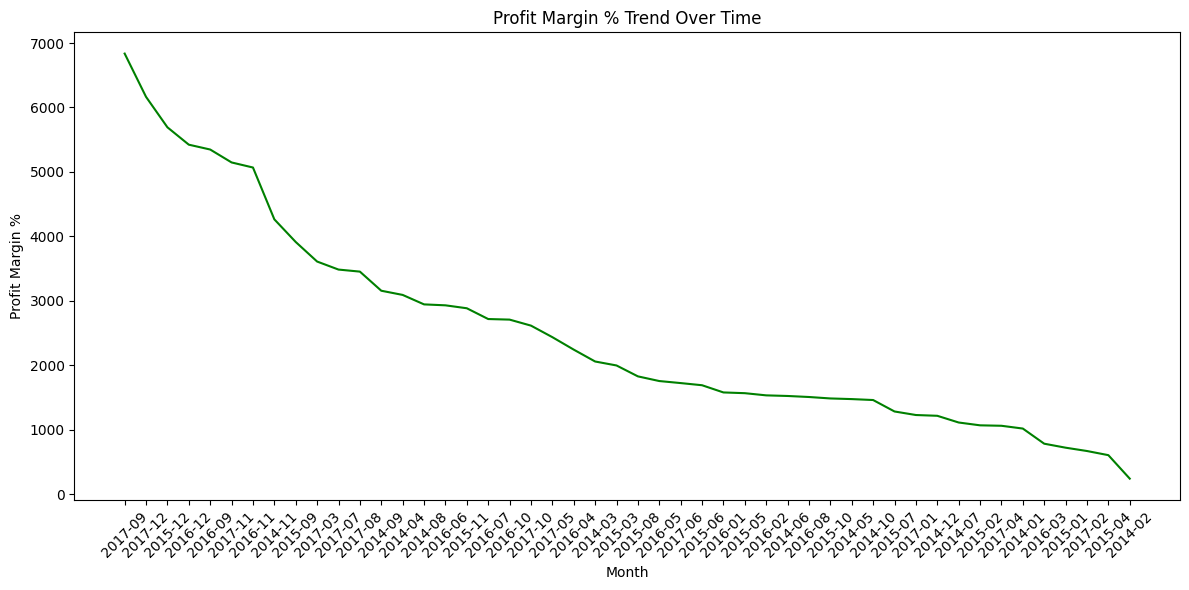

In [76]:
margin_trend = df.groupby('Month')['Profit Margin %'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.lineplot(x=margin_trend.index,y=margin_trend.values,color='green')
plt.title('Profit Margin % Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Profit Margin %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
dis_pro = df.groupby('Discount')['Profit'].mean()
dis_pro

,Profit
Discount,
0.00,66.900292
0.10,96.055074
0.15,27.288298
0.20,24.702572
0.30,-45.679636
0.32,-88.560656
0.40,-111.927429
0.45,-226.646464
0.50,-310.703456


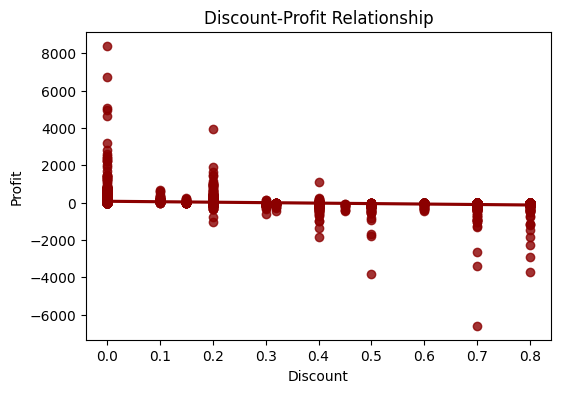

In [78]:
plt.figure(figsize=(6,4))
sns.regplot(x='Discount', y='Profit', data=df,color='darkred')
plt.title('Discount-Profit Relationship')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

In [79]:
cust_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
cust_sales.head(10)

,Sales
Customer Name,
Sean Miller,25043.050
Tamara Chand,19052.218
Raymond Buch,15117.339
Tom Ashbrook,14595.620
Adrian Barton,14473.571
Ken Lonsdale,14175.229
Sanjit Chand,14142.334
Hunter Lopez,12873.298
Sanjit Engle,12209.438


In [80]:
cust_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)
cust_profit.head(10)

,Profit
Customer Name,
Tamara Chand,8981.3239
Raymond Buch,6976.0959
Sanjit Chand,5757.4119
Hunter Lopez,5622.4292
Adrian Barton,5444.8055
Tom Ashbrook,4703.7883
Christopher Martinez,3899.8904
Keith Dawkins,3038.6254
Andy Reiter,2884.6208


In [81]:
neg_profit_cust = cust_profit.tail(10)
neg_profit_cust

,Profit
Customer Name,
Natalie Fritzler,-1695.9714
Christine Phan,-1850.3029
Sean Miller,-1980.7393
Sean Braxton,-2082.7451
Nathan Cano,-2204.8072
Henry Goldwyn,-2797.9635
Sharelle Roach,-3333.9144
Luke Foster,-3583.9770
Grant Thornton,-4108.6589


In [82]:
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Shipping Days'].head(10)

,Shipping Days
0,3
1,3
2,4
3,7
4,7
5,5
6,5
7,5
8,5
9,5


In [83]:
avg_ship_time = df['Shipping Days'].mean().astype(int)
print(f"Average Shipping Time: {avg_ship_time} days")

Average Shipping Time: 3 days


In [84]:
ship_region = df.groupby('Region')['Shipping Days'].mean().round(0)
ship_region

,Shipping Days
Region,
Central,4.0
East,4.0
South,4.0
West,4.0


In [85]:
ship_mode_time = df.groupby('Ship Mode')['Shipping Days'].mean().round(0)
ship_mode_time

,Shipping Days
Ship Mode,
First Class,2.0
Same Day,0.0
Second Class,3.0
Standard Class,5.0


In [86]:
df['Month'] = df['Order Date'].dt.month_name()
heatmap_data = (df.pivot_table(index='Month',values='Shipping Days',
                              aggfunc='mean')).astype(int)
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
heatmap_data = heatmap_data.reindex(month_order)
heatmap_data

,Shipping Days
Month,
January,4
February,4
March,3
April,4
May,3
June,3
July,3
August,4
September,3


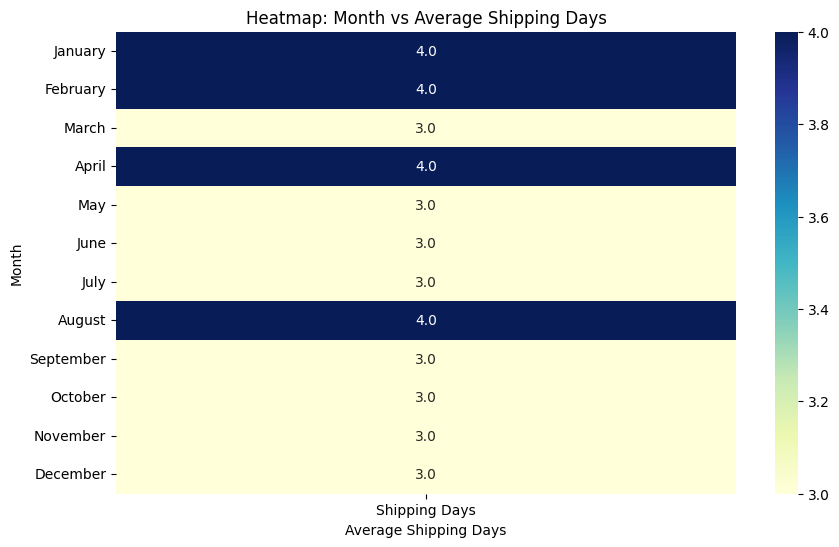

In [87]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data,annot=True,cmap='YlGnBu',fmt='.1f')
plt.title("Heatmap: Month vs Average Shipping Days")
plt.xlabel("Average Shipping Days")
plt.ylabel("Month")
plt.show()